# Принятие решений на основе данных

**СОДЕРЖАНИЕ:**

[**Часть 1. Приоритизация гипотез.**](#step1)

[**Шаг 2. Загрузка данных и подготовка их к анализу**](#step2)

### Часть 1. Приоритизация гипотез. <a name="step1" />

**Подготовка данных**

Создадим поле для выгрузки всех необходимых библиотек.

In [1]:
import pandas as pd

import numpy as np

import matplotlib

from matplotlib import pyplot as plt

from scipy import stats as st
import scipy.stats as stats
import plotly as py

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def upload_file(local, server):
    '''Функция читает дата фрейм, вне зависимости от нахождения файла (на локальной машине или на сервере)'''
    try:
        df = pd.read_csv(local)
    except:
        df = pd.read_csv(server)
    return df

    

In [3]:
def print_common_info(df):    
    '''Функция печатает общую информацию о дата фрейме'''
    df.columns=df.columns.str.lower()
    df.columns=df.columns.str.replace(' ', '_')
    
    print('Выведем 5 первых строк таблицы:','\n', df.head())
    print()
    print('Выведем общую информацию:')
    print()
    df.info() 
    print()
    print('Кол-во дубликатов', df.duplicated().sum())

Загрузим файл с помощью функции upload_file

In [4]:
hypothesis = upload_file('./datasets/hypothesis.csv', '/datasets/hypothesis.csv')

Выведем общую информацию о таблице с помощью функции print_common_info.

In [5]:
print_common_info(hypothesis)

Выведем 5 первых строк таблицы: 
                                           hypothesis  reach  impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   confidence  efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  

Выведем общую информацию:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

Кол-во дубликатов 0


Познакомимся с данными таблицы полностью

In [6]:
pd.set_option('max_colwidth', -1)
hypothesis


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Структура таблицы hypothesis:
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица готоова к дальнейшей работе. В ней нет пропусков, дубликатов, верные форматы данных , названия столбцов приведены к одному регистру.

**Фреймворк ICE**

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») — один из самых популярных способов приоритизации задач. ICE SCORE расчитывыется по формуле: ICE SCORE  = (impact * confidence) /efforts.

In [7]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']),2)
hypothesis_ICE = hypothesis.sort_values(by='ICE', ascending=False)[['hypothesis', 'ICE']]
pd.set_option('max_colwidth', -1)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективными гипотезами по оценке ICE являются гипотезы 8,0, 7, 6 и 2.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [8]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis.sort_values(by='RICE', ascending=False)[['hypothesis', 'RICE']]
pd.set_option('max_colwidth', -1)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [9]:
total_hyp = hypothesis_ICE.merge(hypothesis_RICE)
cm = sns.light_palette("green", as_cmap=True)
total_hyp.style.background_gradient(cmap=cm)

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


В числе наиболее перспективных гипотез по оценке RICE остались те же самые 5 гипотез, однако места в рейтинге распределились совершенно иначе. И причиной послужил показатель: охват пользователей (REACH). На первое место вышла гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". А на пятое места ушла гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения". Охват 7 гипотезы сильно выше, чем охват 8. Именинником пользователь может стать только раз в году, к сожалению.


### Часть 2. Анализ A/B-теста <a name="step2" />

**Подготовка данных**

Загрузим файлы с помощью функции upload_file

In [10]:
orders = upload_file('./datasets/orders.csv', '/datasets/orders.csv')

In [11]:
visitors = upload_file('./datasets/visitors.csv', '/datasets/visitors.csv')

Выведем общую информацию о таблице с помощью функции print_common_info.

In [12]:
print_common_info(orders)

Выведем 5 первых строк таблицы: 
    transactionid   visitorid        date  revenue group
0  3667963787     3312258926  2019-08-15  1650     B   
1  2804400009     3642806036  2019-08-15  730      B   
2  2961555356     4069496402  2019-08-15  400      A   
3  3797467345     1196621759  2019-08-15  9759     B   
4  2282983706     2322279887  2019-08-15  2308     B   

Выведем общую информацию:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Кол-во дубликатов 0


Проверим, нет ли покупателей с одинаковым ID одновременно в двух группах. Для дальнейшей проверки узнаем количество уникальных покупателей в таблице.

In [13]:
len(orders['visitorid'].unique())

1031

Теперь создадим список, куда добавим покупателей, которые присутствуют сразу в двух группах и сосчитаем их количество.

In [14]:
x = orders.groupby(by='visitorid', as_index=False).agg({'group': pd.Series.nunique})
dublicates = x.loc[x['group'] > 1]
print(len(dublicates))

58


Перезапишем таблицу с заказами, исключив "Двойных агентов" и посчитаем количество строк, чтобы понять, не удалили ли мы лишнего.

In [15]:
orders = orders[~orders.visitorid.isin(list(dublicates['visitorid']))]
len(orders['visitorid'].unique())

973

Все правильно, не удалили)

Выведем общую информацию о таблице с помощью функции print_common_info.

In [16]:
print_common_info(visitors)

Выведем 5 первых строк таблицы: 
          date group  visitors
0  2019-08-01  A     719     
1  2019-08-02  A     619     
2  2019-08-03  A     507     
3  2019-08-04  A     717     
4  2019-08-05  A     756     

Выведем общую информацию:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Кол-во дубликатов 0


В данных таблицах в столбцах, содежащих дату, тип данных object. Необходимо привести данные столбцов к необходимому для дальнейших расчетов формату.

In [17]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Узнаем, за какой период у нас данные в таблицах

In [19]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [20]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [21]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [22]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [23]:
len(orders)

1016

Данные подготовлены, в данных отсутствуют пропуски, дубликаты, в столбцах с датами изменен формат на необходимый. В данных было обнаружено задвоение покупателей при распределении на группы А и В. Таких покупателей оказалось 58 и мы их исключили из обеих групп для чистоты расчетов. В таблице orders осталось 1016 строк. Так же мы определили период, за который собраны данные: с 1 по 31 августа 2019 г. Теперь можно приступать к расчетам.

**Проанализируем A/B-тест:**

#### 1.Построим график кумулятивной выручки по группам. 

Выведем по 5 первых строк наших таблиц.

In [24]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [25]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group',из таблицы orders. Избавимся от дубликатов методом drop_duplicates().

In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

Получаем агрегированные кумулятивные по дням данные о заказах

In [27]:
 ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [28]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     23      19      142779   719     
1 2019-08-01  B     17      17      59758    713     
2 2019-08-02  A     42      36      234381   1338    
3 2019-08-02  B     40      39      221801   1294    
4 2019-08-03  A     66      60      346854   1845    


Получаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [30]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

и датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [31]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Строим графики выручки по группам

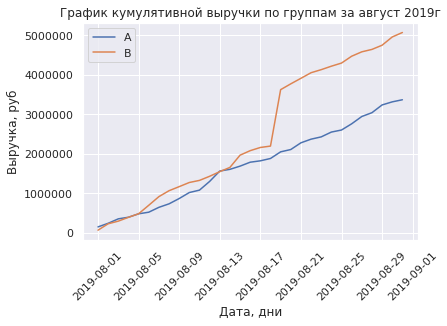

In [32]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.title("График кумулятивной выручки по группам за август 2019г")
plt.xlabel("Дата, дни")
plt.ylabel("Выручка, руб")
plt.legend() 
plt.show()

Мы наблюдаем как чуть раньше середины теста соединяются кривые графиков групп А и В, далее весь оставшийся путь лидирует группа В. Вероятно, в эту группу попали аномально большие заказы.

#### 2.Построим график кумулятивного среднего чека по группам. 

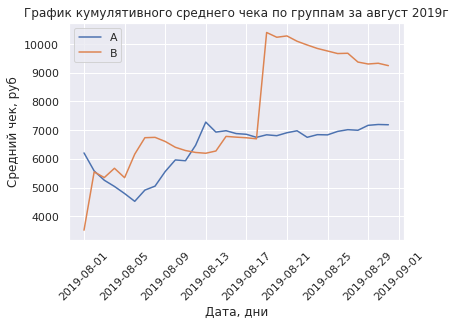

In [33]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title("График кумулятивного среднего чека по группам за август 2019г")
plt.xlabel("Дата, дни")
plt.ylabel("Средний чек, руб")
plt.legend()
plt.show()

Кумулятивное значение среднего чека сильно колеблется. Нам необходимо бует проанализировать выбросы, чтобы понять, не искажают ли они результаты, либо тестирование нужно продлить.

#### 3.Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Собираем данные в одном датафрейме

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

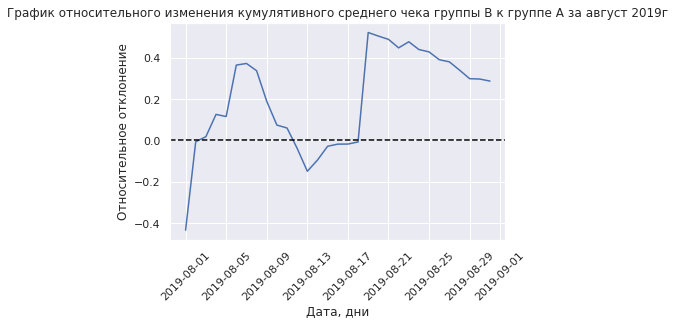

In [35]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A за август 2019г")
plt.xlabel("Дата, дни")
plt.ylabel("Относительное отклонение")

plt.show()

Мы построили график относительного различия в среднем чеке между группами. По графику видно, что в некоторые даты происходят сильные скачки колебаний. Видимо, в эти даты могли быть совершены аномальные заказы.

#### 4. Построим график кумулятивной конверсии по группам. 

Посчитаем кумулятивную конверсию.

In [36]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [37]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y (["2019-08-01", "2019-08-31", 0.02922, 0.03686])

In [38]:
round(cumulativeData['conversion'].min(),5)

0.02384

In [39]:
round(cumulativeData['conversion'].max(),5)

0.03577

In [40]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

In [41]:
cumulativeData['date'].max()

Timestamp('2019-08-31 00:00:00')

In [42]:
cumulativeData['date']

0    2019-08-01
1    2019-08-01
2    2019-08-02
3    2019-08-02
4    2019-08-03
        ...    
57   2019-08-29
58   2019-08-30
59   2019-08-30
60   2019-08-31
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

In [43]:
#cumulativeDataB.info()

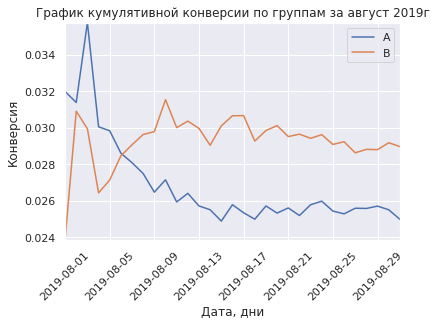

In [44]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02384, 0.03577]) 
plt.title("График кумулятивной конверсии по группам за август 2019г")
plt.xlabel("Дата, дни")
plt.ylabel("Конверсия")

plt.show()

Мы построили график кумулятивной конверсии по группам А и Б. Видим, что конверсия группы А в начале теста стремительно подлетела и затем медленно и верно стала опускаться, в группе Б в начале было несколько резких колебаний, и затем график ушел вверх. Кажется, графики еще не стабилизировались. Но на данном этапе в лидерах группа В.

#### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Объединим таблицы cumulativeDataA и cumulativeDataB

In [45]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

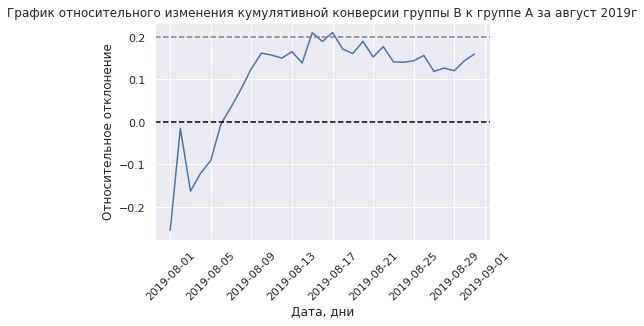

In [46]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
# Мы берем 0.2 потому, что постепенно на примерно это уровне стабилизируется различие между конверсиями
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A за август 2019г")
plt.xlabel("Дата, дни")
plt.ylabel("Относительное отклонение")

plt.show()

В начале теста группа B значительно дважды проигрывала группе A, затем вырвалась вперёд. На середине теста конверсия немного зафиксировалась, затем стала снижаться и к концу графика снова стала расти.
Отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

#### 6. Построим точечный график количества заказов по пользователям.

In [47]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'visitorid' и 'orders'. Назовем его ordersByUsers.

In [48]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorid', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


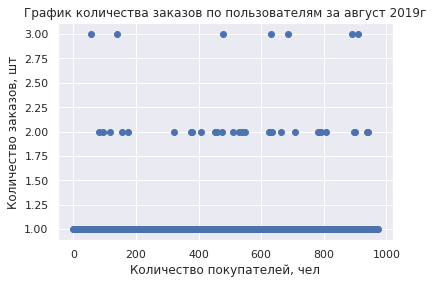

In [49]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title("График количества заказов по пользователям за август 2019г")
plt.xlabel("Количество покупателей, чел")
plt.ylabel("Количество заказов, шт")

plt.show()

Как видно по графику, большинство пользователей формировали лишь по одному заказу, достаточно большое количество - 2 заказа.Уже количество в 3 заказа -похоже на выбросы. Проверим это в следующем шаге.

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [50]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей оформляли более 1 заказа, и не более 1 % - оформляли более 2 заказов. Логично взять за "выбросы" (звучит жестко) тех, кто заказывал 3 и более раз.

#### 8. Построим точечный график стоимостей заказов. 

In [51]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


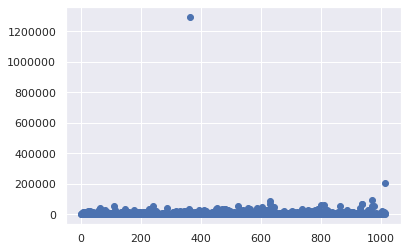

In [52]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 

На графике мы видим всего два аномальных заказа, собственно, как и в таблице. Это заказ на сумму свыше 1,2 млн и заказ свыше 200тыс. Если бы мы удалили заказ за 1,2 млн, график стал бы более четким. Но мы не будем этого делать, чтобы не искажать данные, а посчитаем перцентили.

#### 9.Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [53]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов имеют стоимость выше 26785 , и не более 1 % -выше 53904. Логично взять за "выбросы" выручку свыше 26785 руб.

#### 10.Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

В предыдущих шагах мы:
- Оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы;
- Увидели выбросы и нашли границу для их определения.
Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Начнём с подготовки данных:

Соберем данные в таблицу со следующими данными:

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [54]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


In [55]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']


In [56]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [57]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [58]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


In [59]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [60]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


In [61]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorid', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [62]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

In [63]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA должна состоять из двух частей:
Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:

Список индексов создали функцией np.arange(). Она работает так же, как функция range(), только создаёт массив индексов в формате np.array, который требуется в pd.Series.
В Pandas последовательности объединяют функцией pd.concat() (от англ. concatenate, «сцеплять»). Сперва ей передают то, что объединяют — в нашем случае список из первой и второй части:

In [64]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18286    0
 18287    0
 18288    0
 18289    0
 18290    0
 Name: orders, Length: 18291, dtype: int64]

Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем:

In [65]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
Напомним, что в sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B:конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

Нулевая гипотеза звучит так:В конверсии между группами нет статистически значимых различий. Альтернативная гипотеза: В конверсии между группами есть статистически значимые различия

In [66]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value=', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

print('относительное различие в конверсии между группами = ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
if ((stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]) < 0.05):
    print('Отвергаем нулевую гипотезу, в конверсии между группами есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу, конверсии одинаковые')

p-value= 0.011
относительное различие в конверсии между группами =  0.160
Отвергаем нулевую гипотезу, в конверсии между группами есть статистически значимые различия


p-value меньше 0,05, поэтому нулевую гипотезу отвергаем. анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия.Прирост конверсии группы В к конверсии группы А - равен 16% 

#### 11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза звучит так:Статистически значимых отличий в среднем чеке нет. Альтернативная гипотеза: В среднем чеке  групп есть статистически значимые различия

In [67]:
print('p-value=','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],alternative = 'two-sided')[1]))
print('относительный прирост среднего чека группы B = ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))
if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]) < 0.05):
    print('Отвергаем нулевую гипотезу, в среднем чеке групп есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке нет')

p-value= 0.829
относительный прирост среднего чека группы B =  0.287
Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке нет


p-value значительно больше 0.05.Статистически значимых отличий в среднем чеке нет.Однако, относительное различие среднего чека между сегментами составило 28,7%

#### 12.Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 30000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
Узнаем, сколько всего аномальных пользователей методом shape().

In [68]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0, 
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64
(49,)


У нас 68 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [69]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

Нулевая гипотеза звучит так:В конверсии между группами нет статистически значимых различий. Альтернативная гипотеза: В конверсии между группами есть статистически значимые различия

In [70]:
print('p-value = ''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print('Относительное изменение конверсии по группам = ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))
if (((stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1])) < 0.05):
    print('Отвергаем нулевую гипотезу, в конверсии между группами есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу, конверсии одинаковые')

p-value = 0.010
Относительное изменение конверсии по группам = 0.187
Отвергаем нулевую гипотезу, в конверсии между группами есть статистически значимые различия


P-value не сильно изменился. Прирост конверсии группы В к конверсии группы А - равен 18.7%, что на 2.7% больше, чем по сырым данным (16%)

#### 13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Нулевая гипотеза звучит так:Статистически значимых отличий в среднем чеке нет. Альтернативная гипотеза: В среднем чеке групп есть статистически значимые различия

In [71]:
print('p-value = ',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided'
        )[1]
    )
)
p=(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid'].isin(abnormalUsers)), )]['revenue'],alternative = 'two-sided')[1])
print('Относительное изменение среднего чека', "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid'].isin(abnormalUsers)),)]['revenue'].mean() - 1)) 
if p < 0.05:
    print('Отвергаем нулевую гипотезу, в среднем чеке групп есть статистически значимые различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке нет')

p-value =  0.741
Относительное изменение среднего чека -0.027
Не получилось отвергнуть нулевую гипотезу, статистически значимых отличий в среднем чеке нет


p-value изменился в сравнении с сырыми данными  на 0.045 и остался больше 0.05. Следовательно статистически значимых отличий в среднем чеке все-таки нет. а вот 
прирост среднего чека группы B по сырым данным был  28.7% а стал отрицательным и равным -2.7%. Кажется наш заказ на миллион попал именно в группу B.

#### 14.Необходимо принять решение по результатам теста . Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Мы получили в итоге следующие результаты тестирования:
- При анализе, как "сырых данных", так и очищенных от выбросов данных, мы получили вывод о том, что в конверсии между группами есть статистически значимые различия.Прирост конверсии группы В к конверсии группы А равен 13.8% по сырым данным, по очищенным 17.2%.
- При анализе изменений в среднем чеке по группам, мы получили вывод о том, статистически значимых отличий в среднем чеке между грппами нет (как по сырым , так и по очищенным данным). Однако относительное изменение сильно изменилось после удаления аномальных заказов. (с 25,9 % преимущества группы В поменялось на 2,3 % преимущества группы А).
  То есть на текущий момент мы имеем следующее: По количеству заказов явное и довольно стабильное преимущество у группы В, по сумме заказов тоже побеждает группа В, но это при наличии аномального заказа и только в относительном измерении, т.к. тест показал, что статистически значимых изменений нет. 
  Так же, если взглянуть на полученные ранее графики мы понимаем, что кривые групп А и В не стабилизированы.
  Таким образом, я считаю, что тест нужно продолжить.

### Общий вывод

Мы вместе с отделом маркетинга крупного интернет-магазина подготовили список гипотез для увеличения выручки. Нам необходимо было:

- приоритизировать гипотезы,
- запустить A/B-тест,
- проанализировать результаты.

В первой части исследования мы приоритизировали гипотезы. Мы применили фреймворки ICE и RICE для приоритизации гипотез. Мы выявили, что наиболее перспективными гипотезами по оценке ICE являются гипотезы 8,0, 7, 6 и 2, а по оценке RICE остались те же самые 5 гипотез, однако места в рейтинге распределились совершенно иначе. И причиной послужил показатель: охват пользователей (REACH). На первое место вышла гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". А на пятое места ушла гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения". Охват 7 гипотезы сильно выше, чем охват 8. Именинником пользователь может стать только раз в году, к сожалению

Во второй части исследования мы провели А-В тест. 

В процессе предподготовки данных мы выяснили, что покупатели распределены по группам А и В с ошибкой. Мы выявили 58 покупателей , которые одновременно попали и в группу А и в группу B. Это чуть больше 5 % пользователей, поэтому было принято решение удалить их из данных для чистоты эксперимента.


Мы построили График кумулятивной выручки по группам за август 2019г и увидели, как с середины теста вырвалась вперед группа В. Так же мы построили График кумулятивного среднего чека по группам за август 2019г. Колебания продолжались до конца теста и нам необходимо было проанализировать выбросы, чтобы понять, не искажают ли они результаты, либо тестирование нужно продлить.Мы построили график относительного различия в среднем чеке между группами. По графику видно, что в некоторые даты происходят сильные скачки колебаний. Видимо, в эти даты могли быть совершены аномальные заказы.
Мы построили график кумулятивной конверсии по группам А и Б. и обнаружили, что конверсия группы А в начале теста стремительно подлетела и затем медленно и верно стала опускаться, в группе Б в начале было несколько резких колебаний, и затем график ушел вверх. Кажется, графики еще не стабилизировались. Но на данном этапе в лидерах группа В.
Мы построили график относительного изменения кумулятивной конверсии группы B к группе A и выяснили, что отношение конверсии ещё не установилось, и  делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину.

Далее, чтобы выявить аномальные значения по количеству заказов и выручке мы строили точечный график количества заказов по пользователям и точечный график стоимостей заказов. А так же посчитали 95 и 99 перцентили. Аномальным числом заказов было принято считать заказы в количестве 3х и выше, а выручку  считаем аномальной, если она превышает 30000 руб.

Сравнивая "сырые" и очищенные от аномалий данные , мы пришли к следующим выводам:
Мы получили в итоге следующие результаты тестирования:

 - При анализе, как "сырых данных", так и очищенных от выбросов данных, мы получили вывод о том, что в конверсии между группами есть статистически значимые различия.Прирост конверсии группы В к конверсии группы А равен 13.8% по сырым данным, по очищенным 17.2%.
 - При анализе изменений в среднем чеке по группам, мы получили вывод о том, статистически значимых отличий в среднем чеке между грппами нет (как по сырым , так и по очищенным данным). Однако относительное изменение сильно изменилось после удаления аномальных заказов. (с 25,9 % преимущества группы В поменялось на 2,3 % преимущества группы А). То есть на текущий момент мы имеем следующее: По количеству заказов явное и довольно стабильное преимущество у группы В, по сумме заказов тоже побеждает группа В, но это при наличии аномального заказа и только в относительном измерении, т.к. тест показал, что статистически значимых изменений нет. 
- Так же, если взглянуть на полученные ранее графики мы понимаем, что кривые групп А и В не стабилизированы. 


Таким образом, я считаю, что тест нужно продолжить.
